In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1

In [2]:
def der(F,X) :
    n = len(X) - 1
    h = (X[-1]-X[0])/n
    A = np.zeros((n-1,n-1))
    rngs_1 = np.arange(n-2)
    rngs_2 = np.arange(1,n-1)
    A[rngs_1,rngs_1+1] = 1
    A[rngs_2,rngs_2-1] = -1
    x_full = F(X)
    x_part = x_full[1:-1]
    y = np.zeros_like(x_part)
    y[0] , y[-1] = -x_full[0] , -x_full[-1]
    return 1/(2*h)*(np.dot(A,x_part)+y)

def sec_der(F,X) :
    n = len(X) - 1
    h = (X[-1]-X[0])/n
    A = np.zeros((n-1,n-1))
    np.fill_diagonal(A,-2)
    rngs_1 = np.arange(n-2)
    rngs_2 = np.arange(1,n-1)
    A[rngs_1,rngs_1+1] = 1
    A[rngs_2,rngs_2-1] = 1
    x_full = F(X)
    x_part = x_full[1:-1]
    y = np.zeros_like(x_part)
    y[0] , y[-1] = x_full[0] , x_full[-1]
    return 1/h**2*(np.dot(A,x_part)+y)

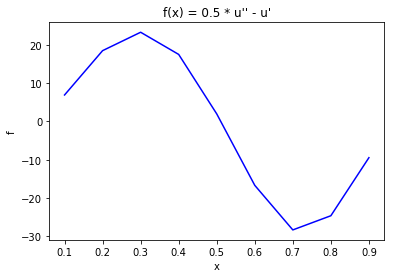

In [3]:
def u(x) :
    return np.sin((x+np.pi)**2-1)

a = 0
b = 1
n = 10
X = np.linspace(a,b,n+1)
y = 0.5*sec_der(u,X) - der(u,X)
x = X[1:-1]
plt.plot(x,y,'-b')
plt.title("f(x) = 0.5 * u'' - u'")
plt.xlabel('x')
plt.ylabel('f')
plt.show()

### Problem 2

In [4]:
def integ(F,X,eps,alpha,beta) :
    n = len(X) - 1
    h = (X[-1]-X[0])/n
    A = np.zeros((n-1,n-1))
    np.fill_diagonal(A,-2*eps)
    rngs_1 = np.arange(n-2)
    rngs_2 = np.arange(1,n-1)
    A[rngs_1,rngs_1+1] = eps - h/2
    A[rngs_2,rngs_2-1] = eps + h/2
    sol_full = F(X)
    sol_part = sol_full[1:-1]
    y = np.zeros_like(sol_part)
    y[0] , y[-1] = -alpha*(eps+h/2) , -beta*(eps-h/2)
    actual_sol = h**2*sol_part + y
    y = np.linalg.solve(A,actual_sol)
    return np.hstack((alpha,y,beta))

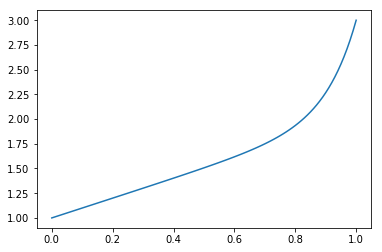

In [7]:
def F(x) :
    return -1*np.ones_like(x)

eps = 1/10
alpha = 1
beta = 3

a = 0
b = 1
n = 100
X = np.linspace(a,b,n+1)

Y = integ(F,X,eps,alpha,beta)
plt.plot(X,Y)
plt.show()

### Problem 3

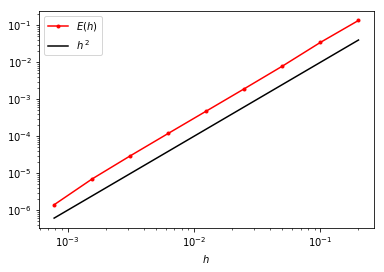

The order of the finite difference approximation is about  2.06974141291 .


In [8]:
num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)
# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
num_sol_best = integ(F, eps=.1, alpha=1, beta=3, X=np.linspace(0,1,N[-1]+1))
for j in range(len(N)-1):
    num_sol = integ(F, eps=.1, alpha=1, beta=3, X=np.linspace(0,1,N[j]+1))
    max_error[j] = np.max(np.abs(num_sol-num_sol_best[::2**(num_approx-j-1)]))
plt.loglog(h,max_error,'.-r',label="$E(h)$")
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$")
plt.xlabel("$h$")
plt.legend(loc='best')
plt.show()
print("The order of the finite difference approximation is about ",
    (np.log(max_error[0])-np.log(max_error[-1]))/(np.log(h[0])-np.log(h[-1])),
    ".")

### Problem 4

In [14]:
def gen_integ(F,X,a1,a2,a3,alpha,beta) :
    n = len(X) - 1
    h = (X[-1]-X[0])/n
    A = np.zeros((n-1,n-1))
    A1 = a1(X)
    A2 = a2(X)
    A3 = a3(X)
    np.fill_diagonal(A,A3[1:-1])
    rngs_1 = np.arange(n-2)
    rngs_2 = np.arange(1,n-1)
    A[rngs_1,rngs_1+1] = [A1[x]+A2[x]*h/2 for x in range(1,n-1)]
    A[rngs_2,rngs_2-1] = [A1[x]-A2[x]*h/2 for x in range(1,n-1)]
    sol_full = F(X)
    sol_part = sol_full[1:-1]
    y = np.zeros_like(sol_part)
    y[0] , y[-1] = -alpha*(a1(X[0])-a2(X[0])*h/2) , -beta*(a1(X[-1]+a2(X[-1])*h/2))
    actual_sol = h**2*sol_part + y
    y = np.linalg.solve(A,actual_sol)
    return np.hstack((alpha,y,beta))

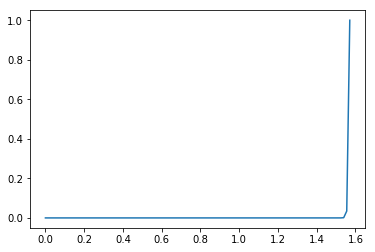

In [15]:
def F(x) :
    return np.cos(x)

eps = 0.1
def a1(x) :
    return eps*np.ones_like(x)

def a2(x) :
    return np.zeros_like(x)

def a3(x) :
    return -4*(np.pi-x**2)

alpha = 0
beta = 1
a = 0
b = np.pi/2
n = 100
X = np.linspace(a,b,n+1)
Y = gen_integ(F,X,a1,a2,a3,alpha,beta)
plt.plot(X,Y)
plt.show()

### Problem 5

In [ ]:
eps = 0.1
def F(x) :
    return -eps*np.pi**2*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)

def a1(x) :
    return eps*np.ones_like(x)

def a2(x) :
    return x

def a3(x) :
    return np.zeros_like(x)

alpha = -2
beta = 0
a = -1
b = 1
n = 100
X = np.linspace(a,b,n+1)
Y = gen_integ(F,X,a1,a2,a3,alpha,beta)
plt.plot(X,Y)
plt.show()

In [ ]:
eps = 0.01
def F(x) :
    return -eps*np.pi**2*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)

def a1(x) :
    return eps*np.ones_like(x)

def a2(x) :
    return x

def a3(x) :
    return np.zeros_like(x)

alpha = -2
beta = 0
a = -1
b = 1
n = 100
X = np.linspace(a,b,n+1)
Y = gen_integ(F,X,a1,a2,a3,alpha,beta)
plt.plot(X,Y)
plt.show()

In [ ]:
eps = 0.001
def F(x) :
    return -eps*np.pi**2*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)

def a1(x) :
    return eps*np.ones_like(x)

def a2(x) :
    return x

def a3(x) :
    return np.zeros_like(x)

alpha = -2
beta = 0
a = -1
b = 1
n = 100
X = np.linspace(a,b,n+1)
Y = gen_integ(F,X,a1,a2,a3,alpha,beta)
plt.plot(X,Y)
plt.show()

### Problem 6

In [ ]:
eps = 0.05
def F(x) :
    return np.zeros_like(x)

def a1(x) :
    return eps + x**2

def a2(x) :
    return 4*x

def a3(x) :
    return 2*np.ones_like(x)

alpha = 1/(1+eps)
beta = 1/(1+eps)
a = -1
b = 1
n = 100
X = np.linspace(a,b,n+1)
Y = gen_integ(F,X,a1,a2,a3,alpha,beta)
plt.plot(X,Y)
plt.show()

In [ ]:
eps = 0.02
def F(x) :
    return np.zeros_like(x)

def a1(x) :
    return eps + x**2

def a2(x) :
    return 4*x

def a3(x) :
    return 2*np.ones_like(x)

alpha = 1/(1+eps)
beta = 1/(1+eps)
a = -1
b = 1
n = 100
X = np.linspace(a,b,n+1)
Y = gen_integ(F,X,a1,a2,a3,alpha,beta)
plt.plot(X,Y)
plt.show()